# ツリーマップを作成する
このnotebookでは[squarify | Pure Python implementation of the squarify treemap layout algorithm.](https://github.com/laserson/squarify) を使用します。




```{note}
ツリーマップはplotlyを使うことでも作成できます。

[Treemap charts with Python - Plotly](https://plotly.com/python/treemaps/)
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib
    !pip install squarify

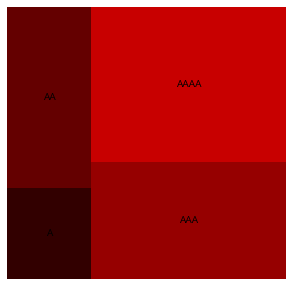

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import squarify

np.random.seed(0)  # 乱数を固定する

labels = ["A" * i for i in range(1, 5)]
sizes = [i * 10 for i in range(1, 5)]
colors = ["#%02x%02x%02x" % (i * 50, 0, 0) for i in range(1, 5)]

plt.figure(figsize=(5, 5))
squarify.plot(sizes, color=colors, label=labels)
plt.axis("off")
plt.show()

## ポートフォリオを可視化する
持っている銘柄ごとの取得価格・現在価格のデータがあったとします。
そこから、[finviz](https://finviz.com/)のようなヒートマップを作ってみます。

### データを作成する
仮に、csvから以下のようなデータを読み込んだとします。

<b>※ここに示しているのは架空のデータです</b>

In [3]:
import pandas as pd

data = [
    ["PBR", 80.20, 130.00],
    ["GOOG", 1188.0, 1588.0],
    ["FLNG", 70.90, 230.00],
    ["ZIM", 400.22, 630.10],
    ["GOGL", 120.20, 90.90],
    ["3466\nラサールロジ", 156.20, 147.00],  # 日本語表示のテスト用
]

df = pd.DataFrame(data)
df.columns = ["銘柄名", "取得価額", "現在の価額"]
df["評価損益"] = df["現在の価額"] - df["取得価額"]
df.head(6)

,銘柄名,取得価額,現在の価額,評価損益
0,PBR,80.20,130.0,49.80
1,GOOG,1188.00,1588.0,400.00
2,FLNG,70.90,230.0,159.10
3,ZIM,400.22,630.1,229.88
4,GOGL,120.20,90.9,-29.30
5,3466\nラサールロジ,156.20,147.0,-9.20


### ツリーマップの色を指定する
利益が出ている箇所を緑色、損が出ている箇所を赤色にします。

In [4]:
colors = []
percents = []
for p_or_l, oac in zip(df["評価損益"], df["取得価額"]):
    percent = p_or_l / oac * 100

    if p_or_l > 0:
        g = np.min([percent * 255 / 100 + 100, 255.0])
        color = "#%02x%02x%02x" % (0, int(g), 0)
        colors.append(color)
    else:
        r = np.min([-percent * 255 / 100 + 100, 255])
        color = "#%02x%02x%02x" % (int(r), 0, 0)
        colors.append(color)

    percents.append(percent)

print(df["銘柄名"].values)
print(colors)
print(percents)

['PBR' 'GOOG' 'FLNG' 'ZIM' 'GOGL' '3466\nラサールロジ']
['#00ff00', '#00b900', '#00ff00', '#00f600', '#a20000', '#730000']
[62.094763092269325, 33.670033670033675, 224.4005641748942, 57.43840887511868, -24.376039933444257, -5.8898847631241935]


### ツリーマップを表示する
損益を色で表現し、損益の割合もツリーマップ上に表示してみます。
日本語が文字化けしていないのは冒頭で `import japanize_matplotlib` としているためです。

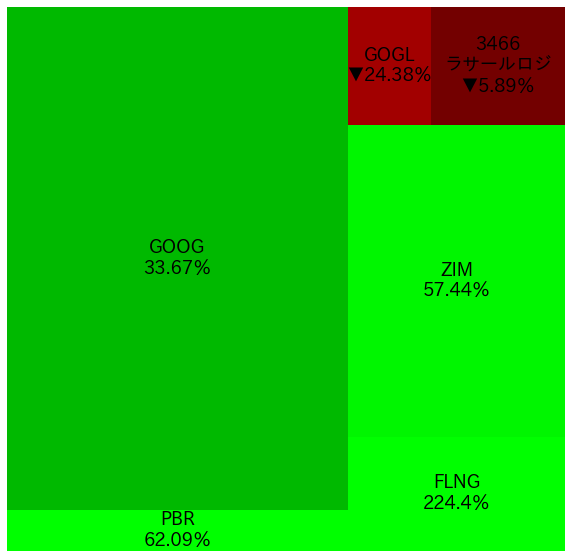

In [5]:
current_prices = [cp for cp in df["現在の価額"]]
labels = [
    f"{name}\n{np.round(percent, 2)}％".replace("-", "▼")
    for name, percent in zip(df["銘柄名"], percents)
]

plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 18
squarify.plot(current_prices, color=colors, label=labels)
plt.axis("off")
plt.show()

### キャッシュの表示を追加する
キャッシュの表示も追加してみます。色はグレーにします。

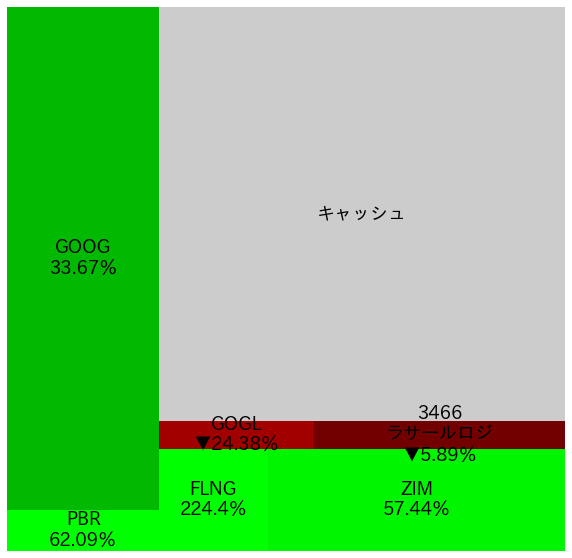

In [6]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 18
squarify.plot(
    current_prices + [3500], color=colors + ["#ccc"], label=labels + ["キャッシュ"]
)
plt.axis("off")
plt.show()